In [237]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitp#lot as skl
sns.set()

In [238]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [239]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [240]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [241]:
#finding the count of classes in the data
data.groupby('Outcome').Outcome.count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

In [242]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [243]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

counting the 0 in each column because BP, skinthikcness etc..cannot be 0

In [244]:
for col in data.columns:
    print(f'{col}:{data[data[col]==0][col].count()}')

Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


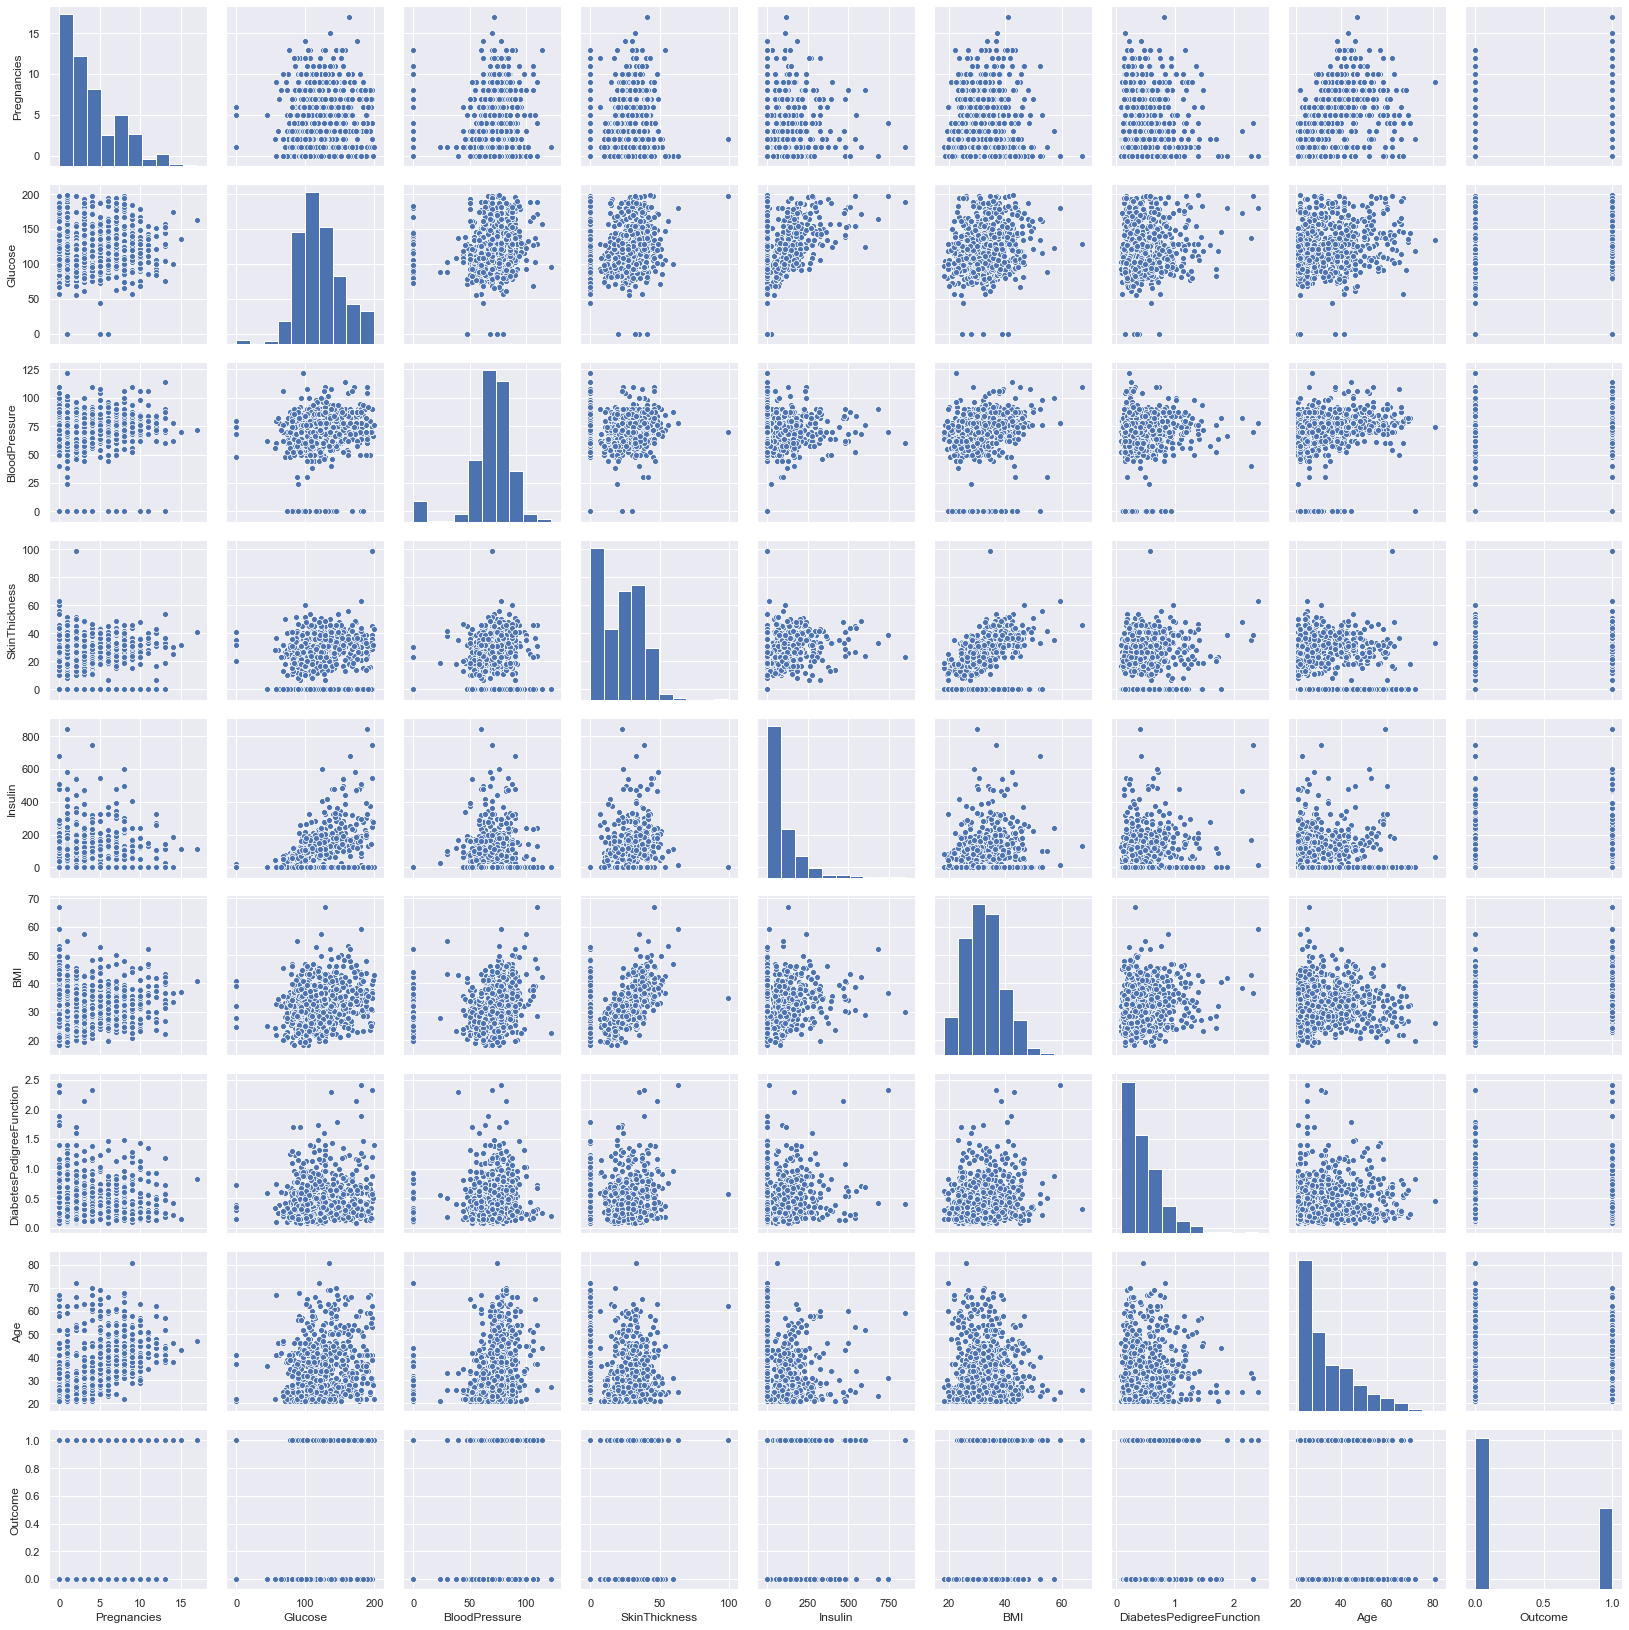

In [87]:
sns.pairplot(data)
#seems like insulin and glucose, and BMI and skinthickness are coorelated so will look closer at them through jointplot
# also we got the distribution of the data

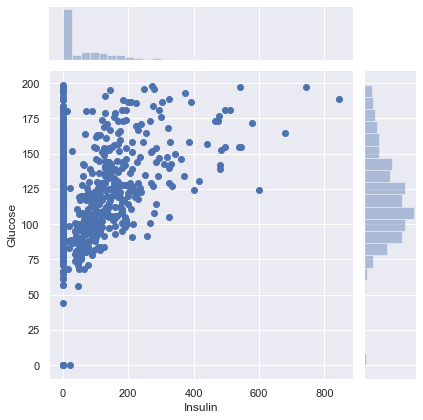

In [88]:
sns.jointplot(data['Insulin'],data['Glucose'])

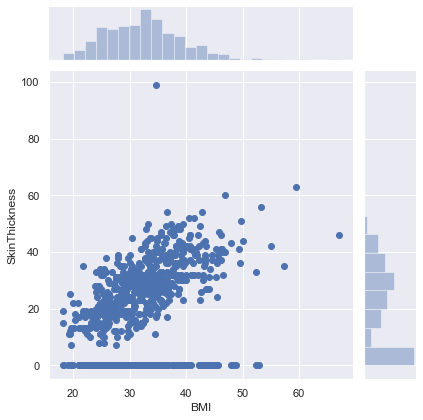

In [89]:
sns.jointplot(data['BMI'],data['SkinThickness'])

In [251]:
ST_train = data[data['SkinThickness']!=0]['SkinThickness']
ST_df = pd.DataFrame({'ST':ST_train})
ST_df.head()

,ST
0,35
1,29
3,23
4,35
6,32


In [252]:
BMI_train = data[data['SkinThickness']!=0]['BMI']
BMI_df = pd.DataFrame({'BMI':BMI_train})
BMI_df.head()

,BMI
0,33.6
1,26.6
3,28.1
4,43.1
6,31.0


In [253]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(BMI_df,ST_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
BMI_test = data[data['SkinThickness']==0]['BMI']
BMI_test = pd.DataFrame({'BMI':BMI_test})
BMI_test.shape

(227, 1)

In [255]:
SkinThickness_test = lm.predict(BMI_test)
SkinThickness_test_df = pd.DataFrame(data = SkinThickness_test, columns = ['SkinThickness'], index = BMI_test.index.copy())
data = pd.merge(data, SkinThickness_test_df, how = 'left', left_index = True, right_index = True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness_x,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_y
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,19.658329
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN
766,1,126,60,0,0,30.1,0.349,47,1,26.389351


In [256]:
data["SkinThickness_y"] = data["SkinThickness_y"].fillna(data["SkinThickness_x"])

In [257]:
data = data.drop('SkinThickness_x', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_y
0,6,148,72,0,33.6,0.627,50,1,35.000000
1,1,85,66,0,26.6,0.351,31,0,29.000000
2,8,183,64,0,23.3,0.672,32,1,19.658329
3,1,89,66,94,28.1,0.167,21,0,23.000000
4,0,137,40,168,43.1,2.288,33,1,35.000000


In [258]:
data = data.rename(columns={'SkinThickness_y':'SkinThickness'})

In [259]:
data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6,148,72,0,33.6,0.627,50,1,35.000000
1,1,85,66,0,26.6,0.351,31,0,29.000000
2,8,183,64,0,23.3,0.672,32,1,19.658329
3,1,89,66,94,28.1,0.167,21,0,23.000000
4,0,137,40,168,43.1,2.288,33,1,35.000000


In [260]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
for col in data.columns:
    print(f'{col}:{data[data[col]==0][col].count()}')

Pregnancies:111
Glucose:0
BloodPressure:35
Insulin:374
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500
SkinThickness:0


In [261]:
cols = ["BloodPressure","Insulin"]
data[cols] = data[cols].replace({0:np.nan})
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
SkinThickness                 0
dtype: int64

In [262]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, verbose=0)
imp.fit(data)
imputed_data = imp.transform(data)
data_final = pd.DataFrame(imputed_data, columns=data.columns)

In [263]:
imp.get_params

<bound method BaseEstimator.get_params of IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=100, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)>

In [264]:
data_final.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6.0,148.0,72.0,219.019234,33.6,0.627,50.0,1.0,35.000000
1,1.0,85.0,66.0,70.372944,26.6,0.351,31.0,0.0,29.000000
2,8.0,183.0,64.0,267.439398,23.3,0.672,32.0,1.0,19.658329
3,1.0,89.0,66.0,94.000000,28.1,0.167,21.0,0.0,23.000000
4,0.0,137.0,40.0,168.000000,43.1,2.288,33.0,1.0,35.000000


In [265]:
for col in data_final.columns:
    print(f'{col}:{data_final[data_final[col]==0][col].count()}')

Pregnancies:111
Glucose:0
BloodPressure:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500
SkinThickness:0


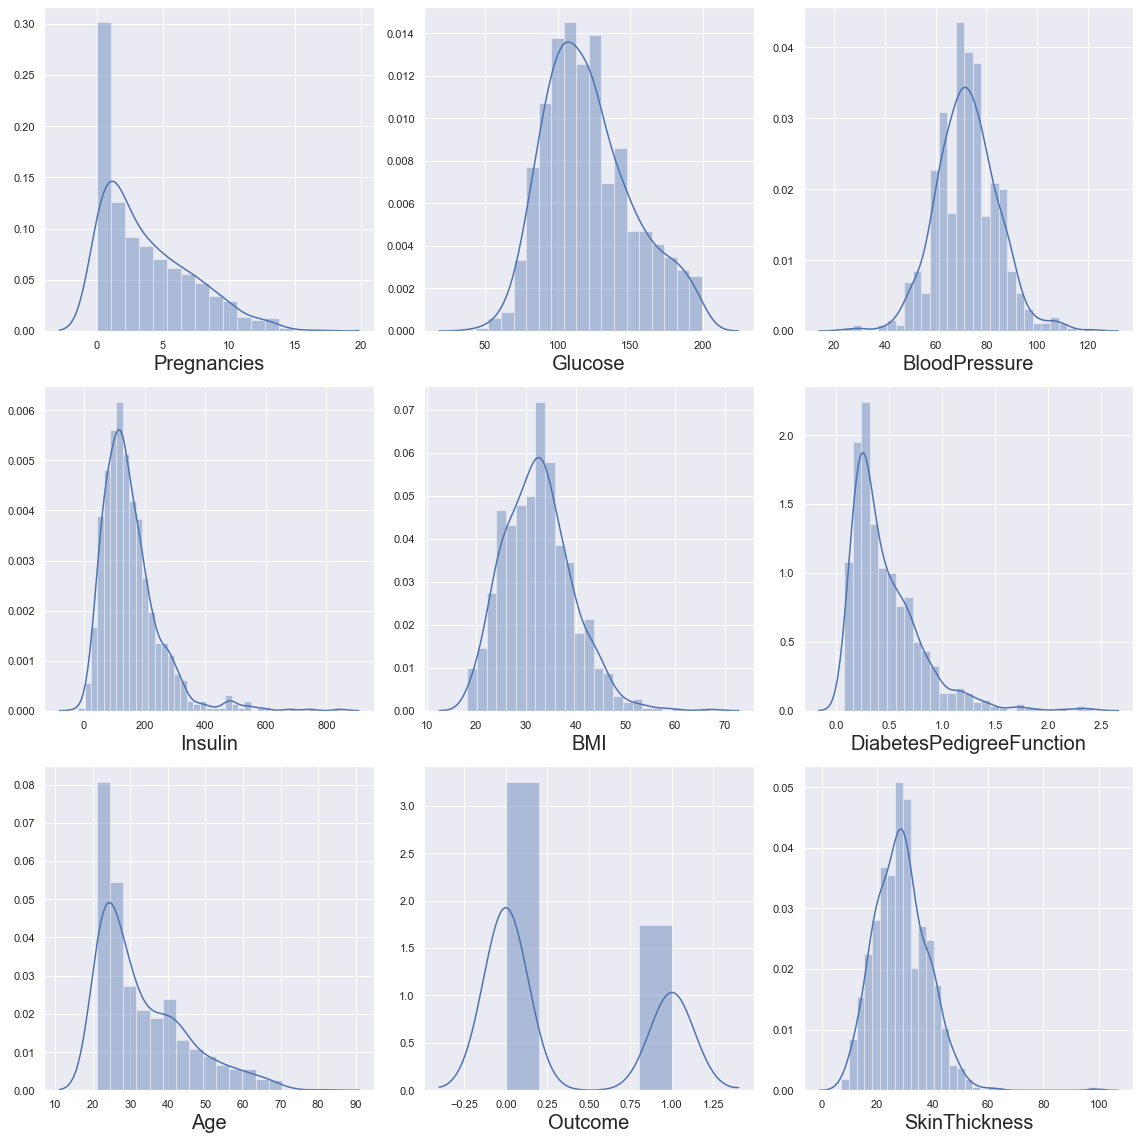

In [266]:
#or a better way to check if data is normally distributed
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in data_final.columns:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_final[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [267]:
data_final.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.354869,152.568642,32.450805,0.471876,33.240885,0.348958,28.716310
std,3.369578,30.436016,12.145679,97.238384,6.875374,0.331329,11.760232,0.476951,9.546749
min,0.000000,44.000000,24.000000,-19.062040,18.200000,0.078000,21.000000,0.000000,7.000000
25%,1.000000,99.750000,64.000000,89.836732,27.500000,0.243750,24.000000,0.000000,22.000000
50%,3.000000,117.000000,72.000000,130.725888,32.000000,0.372500,29.000000,0.000000,28.262731
75%,6.000000,140.250000,80.000000,188.823516,36.600000,0.626250,41.000000,1.000000,35.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000,99.000000


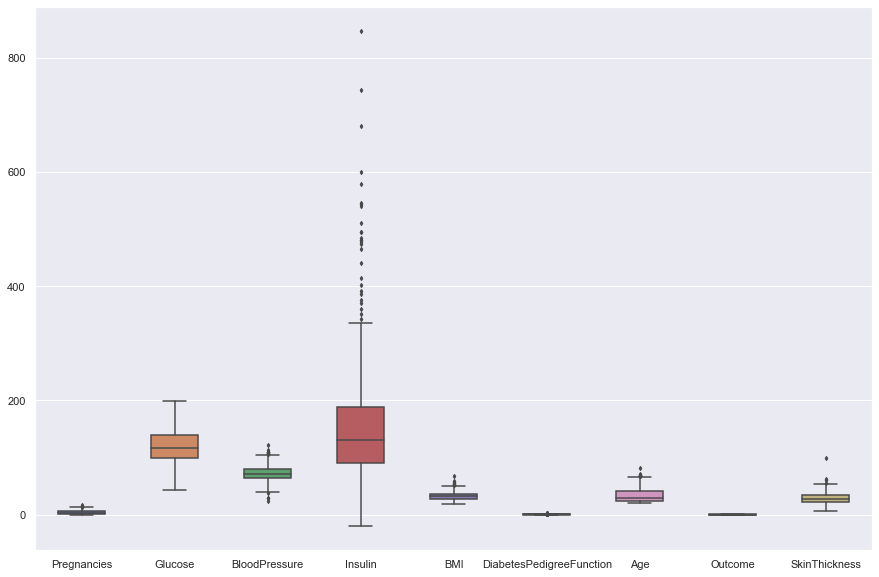

In [268]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_final, width= 0.5,ax=ax,  fliersize=3)

In [269]:
q = data_final['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data_final[data_final['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [270]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6.0,148.0,72.0,219.019234,33.6,0.627,50.0,1.0,35.000000
1,1.0,85.0,66.0,70.372944,26.6,0.351,31.0,0.0,29.000000
2,8.0,183.0,64.0,267.439398,23.3,0.672,32.0,1.0,19.658329
3,1.0,89.0,66.0,94.000000,28.1,0.167,21.0,0.0,23.000000
5,5.0,116.0,74.0,125.372946,25.6,0.201,30.0,0.0,21.934998


In [271]:
data_cleaned.shape

(675, 9)

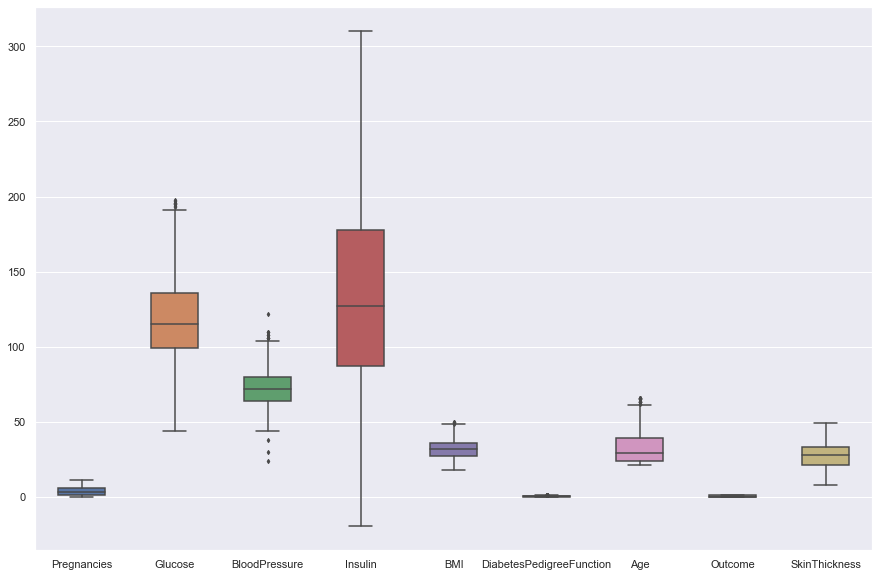

In [272]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

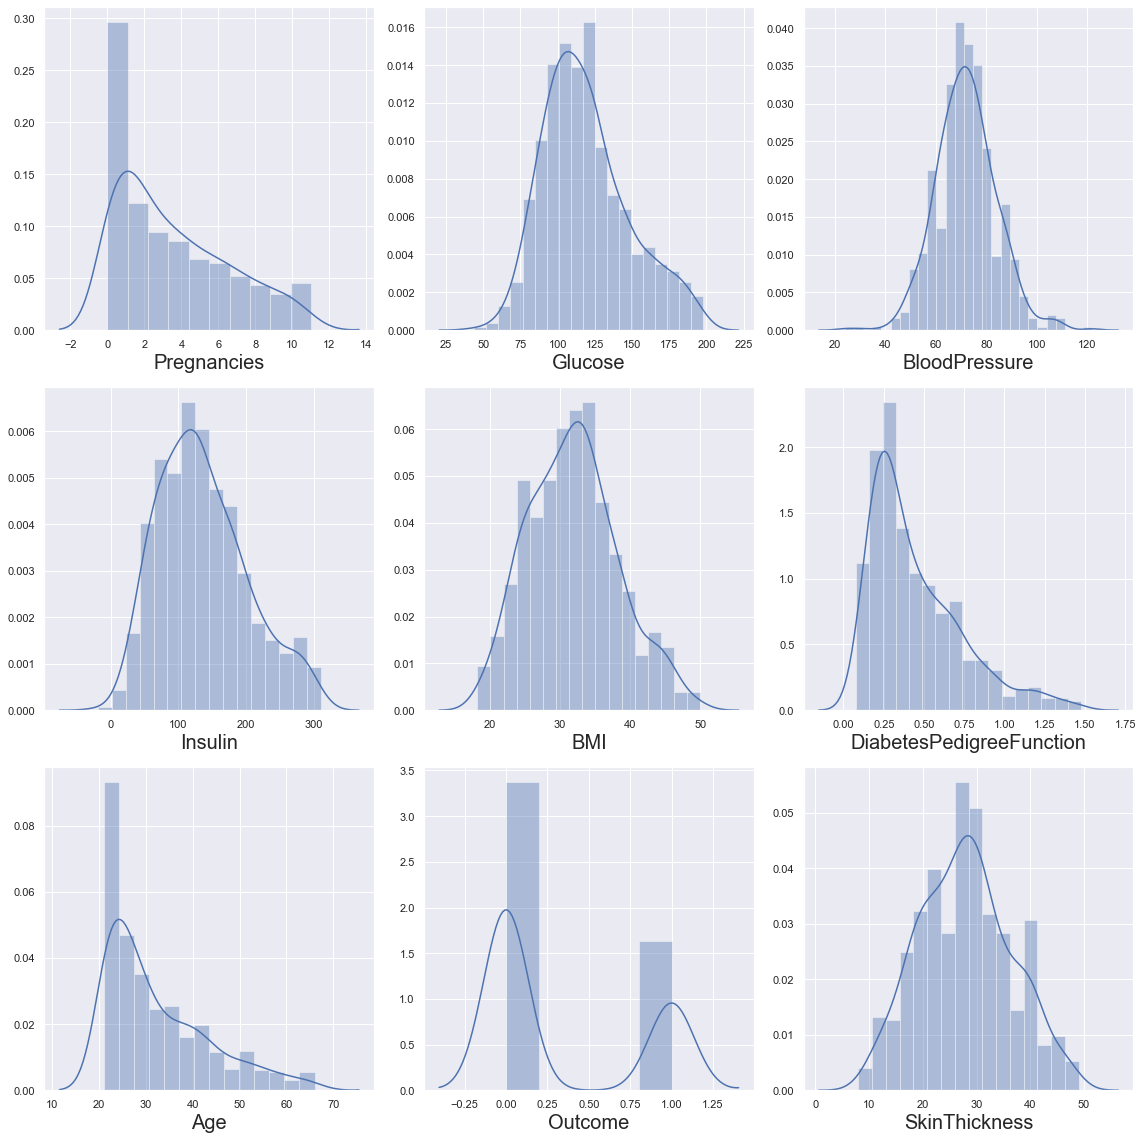

In [273]:
#or a better way to check if data is normally distributed
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in data_cleaned.columns:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [274]:
X = data_cleaned.drop('Outcome',axis=1)
y = data_cleaned['Outcome']

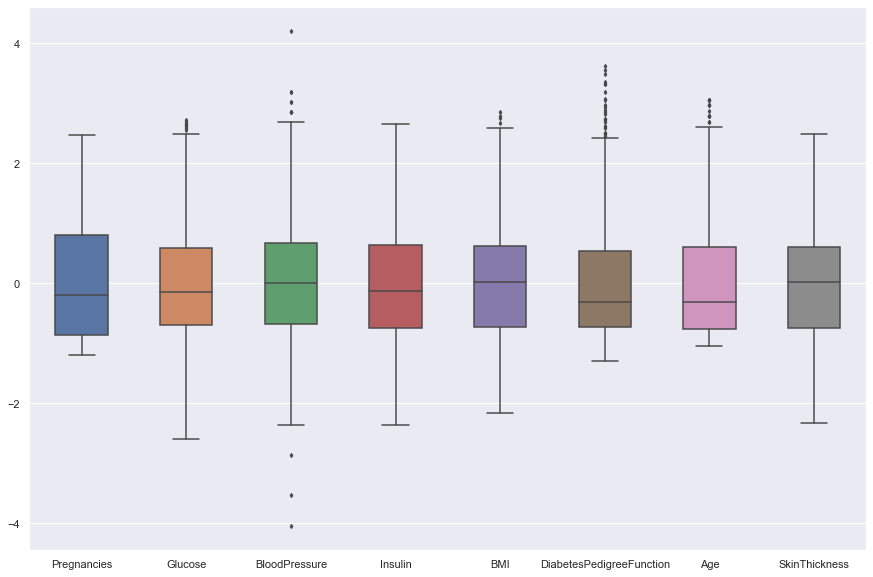

In [275]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_scaled_df, width= 0.5,ax=ax,  fliersize=3)

In [276]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.461741,Pregnancies
1,2.694575,Glucose
2,1.278499,BloodPressure
3,2.884418,Insulin
4,2.322154,BMI
5,1.025438,DiabetesPedigreeFunction
6,1.710899,Age
7,2.149157,SkinThickness


In [287]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [319]:
#formula of accuracy from sklearn
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7810650887573964

In [320]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[96, 16],
       [21, 36]], dtype=int64)

In [321]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print(f'true_positive:{true_positive}')
print(f'false_positive:{false_positive}')
print(f'true_negative:{true_negative}')
print(f'false_negative:{false_negative}')

true_positive:96
false_positive:16
true_negative:36
false_negative:21


In [377]:
#formula of accuracy from scratch
accuracy = np.sum(y_pred == y_test)/ len(X_test)
accuracy

0.7810650887573964

In [378]:
# or simpler way
accuracy = (true_positive + true_negative)/len(X_test)
accuracy

#
# Breaking down the formula for Accuracy
#Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
#Accuracy

0.7810650887573964

In [379]:
#precision
Precision = true_positive/(true_positive+false_positive)
Precision

0.8571428571428571

In [380]:
#or from sklearn ....strangely this gives the specificity score which is not correct
from sklearn import metrics
print(metrics.precision_score(y_test,y_pred))

0.6923076923076923


In [381]:
# Recall or sensitivity
Recall = true_positive/(true_positive+false_negative)
Recall

0.8205128205128205

In [382]:
#specificity
specificity = true_negative/(true_negative + false_positive)
specificity

0.6923076923076923

In [383]:
#false postive rate
1 - specificity

0.3076923076923077

In [316]:
#print the first 10 predicted response

y_pred_class = log_reg.predict(X_test)[0:10]
# for each row this number add up to 1:
#     the left row is the preidcted probablity that each observation is a member of class0
#     the right row is the preidcted probablity that each observation is a member of class1
y_pred_prob = log_reg.predict_proba(X_test)[0:10,1]
y_pred_df = pd.DataFrame({'y_pred_class':y_pred_class,'y_pred_prob':y_pred_prob})
y_pred_df

,y_pred_class,y_pred_prob
0,1.0,0.890890
1,1.0,0.877456
2,0.0,0.348101
3,0.0,0.075581
4,0.0,0.281788
5,0.0,0.170123
6,0.0,0.070665
7,0.0,0.236470
8,0.0,0.425098
9,0.0,0.229699


In [329]:
# =============================================================================
# 
# lets now isolate the predicted probablity of class 1 because knowing that alone 
# enables u to calculate the predicted prob of both classes -
# predict first probalities of 1 (also column 1)    
# 
# =============================================================================
     
                  
#storing the predicted prob of 1s

y_pred_prob = log_reg.predict_proba(X_test)[:,1]
type(y_pred_prob)
y_pred_prob.shape

(169,)

Text(0, 0.5, 'frequency')

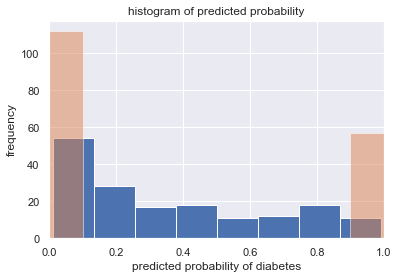

In [331]:
#plot a histogram of these probabilities to help demonstrate how adjusting
# =============================================================================
# the classification threshold can impact the performace the model
# first we need to allow plots to appear and we are overriding one of the default
# matplotlib settings
# will use matplotlib to plot a histgram of the predicted probabilities of class 1
# 
# =============================================================================
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.hist(y_pred_prob,bins=8)
plt.hist(y_test,alpha = 0.5)
plt.xlim(0,1)
plt.title('histogram of predicted probability')
plt.xlabel('predicted probability of diabetes') 
plt.ylabel('frequency')

In [332]:
#lets check in which range the mislcassification is more
y_pred_check = pd.DataFrame({'y_pred_prob':y_pred_prob,'y_pred_class':y_pred,'y_test':y_test})
y_pred_check.tail()

,y_pred_prob,y_pred_class,y_test
320,0.280406,0.0,0.0
525,0.029493,0.0,0.0
580,0.680328,1.0,1.0
495,0.753803,1.0,0.0
353,0.041036,0.0,0.0


In [333]:
prob_bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in prob_bins:
    temp_check_df = y_pred_check[y_pred_check['y_pred_prob']<=i]
    conf_matrix = confusion_matrix(temp_check_df['y_test'],temp_check_df['y_pred_class'])
    print(f'confusion matrix till range - prob {i} is : \n {conf_matrix}')   

confusion matrix till range - prob 0.1 is : 
 [[45]]
confusion matrix till range - prob 0.2 is : 
 [[68  0]
 [ 4  0]]
confusion matrix till range - prob 0.3 is : 
 [[80  0]
 [12  0]]
confusion matrix till range - prob 0.4 is : 
 [[86  0]
 [16  0]]
confusion matrix till range - prob 0.5 is : 
 [[96  0]
 [21  0]]
confusion matrix till range - prob 0.6 is : 
 [[96  7]
 [21  3]]
confusion matrix till range - prob 0.7 is : 
 [[96  8]
 [21  8]]
confusion matrix till range - prob 0.8 is : 
 [[96 12]
 [21 22]]
confusion matrix till range - prob 0.9 is : 
 [[96 14]
 [21 31]]
confusion matrix till range - prob 1 is : 
 [[96 16]
 [21 36]]


See going by the threshold bins we can safely conclude that the misclassification happenened at maximum in the min range 0.3 to 0.4. In that range, given the trhershold we have at 0.5, we misclassified as 0 while the y_test was 1. So we now have a fdair idea of the thershold that we need to follow. It should be 0.35 instead if 0.5.

If we want to change the thershold to 0.35:

we can use binarize function from sklearn preprocessing that will return 1 for all values above 0.35 and a 0 otherwise
the results are in a 2 dimensional numpy array and we slice out the first dimension using the  bracket notation and save the results in the y_pred_class object

In [356]:
import numpy as np    
from sklearn.preprocessing import binarize
# has to convert it to a 2D array because binarize function expects it to be
#done by reshaping
y_pred_class = binarize(y_pred_prob.reshape(1,-1),0.3)
y_pred_class_new = y_pred_class.ravel()
conf_mat_new = confusion_matrix(y_test,y_pred_class_new)
print(conf_mat_new)

[[80 32]
 [12 45]]


In [358]:
new_true_positive = conf_mat_new[0][0]
new_false_positive = conf_mat_new[0][1]
new_false_negative = conf_mat_new[1][0]
new_true_negative = conf_mat_new[1][1]
print(f'new_true_positive:{new_true_positive}')
print(f'new_false_positive:{new_false_positive}')
print(f'new_true_negative:{new_true_negative}')
print(f'new_false_negative:{new_false_negative}')

new_true_positive:80
new_false_positive:32
new_true_negative:45
new_false_negative:12


In [359]:
sum(y_test==1)
#the overall postive cases are 57 ///

57

In [360]:
# see we increase the sensitivity of the model from .82 t0 .86 but our accuracy reduces from.78 to .73

In [385]:
#formula of accuracy from scratch
new_accuracy = np.sum(y_pred_class_new == y_test)/ len(X_test)
new_accuracy

0.7396449704142012

In [386]:
new_Recall = new_true_positive/(new_true_positive+new_false_negative)
new_Recall

0.8695652173913043

In [387]:
#specificity of our model descreases from .69 to .58
new_specificity = new_true_negative/(new_true_negative + new_false_positive)
new_specificity

0.5844155844155844

In [388]:
# Precison of our model decreased from .85 to .71
new_Precision = new_true_positive/(new_true_positive+new_false_positive)
new_Precision

0.7142857142857143

In [389]:
# comparing the F1 scores of these 2 models one with threshold 0.5 and another with threshold 0.3

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
new_F1_Score = 2*(new_Recall * new_Precision) / (new_Recall + new_Precision)
print(f'F1_Score of model with threshold 0.5 is: {F1_Score}')
print(f'F1_Score of model with threshold 0.3 is: {new_F1_Score}')

F1_Score of model with threshold 0.5 is: 0.8384279475982533
F1_Score of model with threshold 0.3 is: 0.7843137254901961


so we can conclude that the F1score of the model has decresed by changing the threshold to 0.3 to increase senstivity

concluded - sensiticty and specificity has a inverse relationshop
remember drcreasing the threshold will be one of the last steps u should take in
model building process
The majority of the time should be on building better model and seleting the best possible model

auc score:0.7443609022556391


Text(0, 0.5, 'True positive rate(sentisivity)')

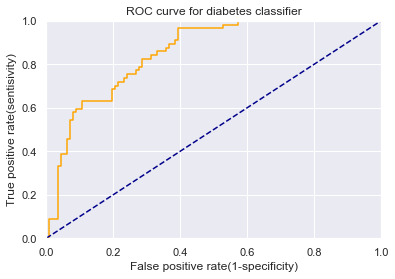

In [397]:
# =============================================================================
#    ROC Curves and area under the curve (AUC)
#    
#    wouldn't it be nice if we can check how sensitivity and specificuty are affected by
#    various thresholds without changing the threshold?
#    Answer is to plot ROC and AUD
#    ROC curve can help you to choose a threshold that balances sensitivity and specificity
#    in a way that makes sense for ur particular context
#    though u cant atually see the threshold used to genrate the curve on the ROC curve iself
# =============================================================================


# first arg is true values, second arg is predicted
#false positive rate
#true positive rate
#dont take y_pred_class or class1 bcpz it will generate incorrect result with giving error
auc = roc_auc_score(y_test, y_pred)
print(f'auc score:{auc}')
#plottoing with proba
fpr,tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sentisivity)')

Text(0, 0.5, 'True positive rate(sentisivity)')

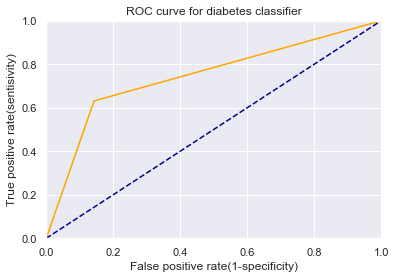

In [430]:
#plottoing with pred class
fpr,tpr, thresholds = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sentisivity)')

In [401]:
# a ROC curve helps u visually choose a threshold that balances sensitivity and 
#specificity

# a small function written below to pass a value of the threshold to evaluate 
#sensitivity and specificyt

# Area under the ROC curve
# because an ideal classifier wud hug the upper left corner of the curve, a bigger area of AUC
# is indicative of a better over all classifier
# AUC is a single number unit that summarizes of the performance of a classifier as an alternative to 
# classification accuracy

# if you randomly chose one postive and one negative observation, AUC represents 
# the likelihood that the classifier will assign a higher predicted probability to the
# postive observation
# AUC is useful when there is a highclass imbalance (unlike classicifcation accuracy)

In [447]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [437]:
#ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
#You can't actually see the thresholds used to generate the curve on the ROC curve itself
evaluate_threshold(0.5)

Sensitivity: 0.631578947368421
Specificity: 0.8571428571428572


In [438]:
evaluate_threshold(0.65)

Sensitivity: 0.631578947368421
Specificity: 0.8571428571428572


In [439]:
def evaluate_threshold(threshold):
    Sensitivity =  tpr[thresholds > threshold][-1]
    Specificity = 1 - fpr[thresholds > threshold][-1]
    return Sensitivity, Specificity

In [443]:
evaluate_threshold(0.9)

(0.631578947368421, 0.8571428571428572)

In [446]:
import warnings
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.81687527448397